In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import os
import cv2 #computer vision
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.models import save

In [9]:
path1="D:\data set\cnn\CNN dataset\malefemale\MaleandFemalefacedataset"
cate=['FemaleFaces','MaleFaces']

In [10]:
image_size=100
input_image=[]
for i in cate:
    folders=os.path.join(path1,i)
    label=cate.index(i)
    for image in os.listdir(folders):
        image_path=os.path.join(folders,image)
        image_array=cv2.imread(image_path)
        image_array=cv2.resize(image_array,(image_size,image_size))
        input_image.append([image_array,label])

In [11]:
len(input_image)

5418

In [48]:
np.random.shuffle(input_image)

In [49]:
X=[]
Y=[]

for X_values,labels in input_image:
    X.append(X_values)
    Y.append(labels)
    

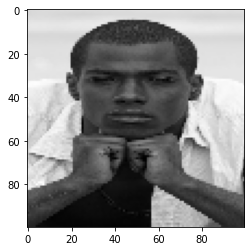

In [50]:
plt.imshow(X[1])

In [15]:
X=np.array(X)
Y=np.array(Y)

In [16]:
X=X/255 

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from keras.utils.np_utils import to_categorical

In [18]:
model=Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128,activation='relu',input_shape=X.shape[1:]))
model.add(Dropout(0.25))

model.add(Dense(2,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.fit(X,Y,epochs=10 ,batch_size=64,validation_split=.20)

Epoch 1/10
68/68 [==============================] - 97s 1s/step - loss: 0.5826 - accuracy: 0.6906 - val_loss: 0.4382 - val_accuracy: 0.7832
Epoch 2/10
68/68 [==============================] - 90s 1s/step - loss: 0.3115 - accuracy: 0.8662 - val_loss: 0.2754 - val_accuracy: 0.8875
Epoch 3/10
68/68 [==============================] - 88s 1s/step - loss: 0.1462 - accuracy: 0.9476 - val_loss: 0.1798 - val_accuracy: 0.9428
Epoch 4/10
68/68 [==============================] - 87s 1s/step - loss: 0.0636 - accuracy: 0.9832 - val_loss: 0.1020 - val_accuracy: 0.9760
Epoch 5/10
68/68 [==============================] - 90s 1s/step - loss: 0.0266 - accuracy: 0.9945 - val_loss: 0.0848 - val_accuracy: 0.9843
Epoch 6/10
68/68 [==============================] - 91s 1s/step - loss: 0.0178 - accuracy: 0.9952 - val_loss: 0.0908 - val_accuracy: 0.9880
Epoch 7/10
68/68 [==============================] - 88s 1s/step - loss: 0.0079 - accuracy: 0.9986 - val_loss: 0.1038 - val_accuracy: 0.9834
Epoch 8/10
68/68 [==

In [20]:
pred=model.predict(X)
pred=np.argmax(pred , axis = 1)
pred

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [21]:
from sklearn.metrics import *
tab=confusion_matrix(Y,pred)
tab

array([[2688,   10],
       [   7, 2713]], dtype=int64)

In [22]:
acc=accuracy_score(Y,pred)
acc*100

99.68623108157992

In [23]:
from keras.models import load_model
from keras.models import save

In [24]:
model.save("malefemale.h5")

In [25]:
#---------------------------------------------------------------------------------------------------#

In [2]:

model=load_model('malefemale.h5')

In [3]:
results={0:'Female',1:'Male' }
GR_dict={0:(0,255,255),1:(0,255,0)}

rect_size = 4
cap = cv2.VideoCapture(0)
haarcascade=cv2.CascadeClassifier(r"D:\data set\Harcascade\haarcascade_frontalface_alt.xml")
while True:
    (rval, im) = cap.read()
    im=cv2.flip(im,1,1) 

    
    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    faces = haarcascade.detectMultiScale(rerect_size)
    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f] 
        
        face_img = im[y:y+h, x:x+w]
        rerect_sized=cv2.resize(face_img,(100,100))
        normalized=rerect_sized/255.0
        reshaped=np.reshape(normalized,(1,100,100,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)
        
        label=np.argmax(result,axis=1)[0]
        
        cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
        cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),2)

    cv2.imshow('Liv Camera',   im)
    key = cv2.waitKey(10)
    if key == 27: # use the escape key
        break

cap.release()

cv2.destroyAllWindows()

